In [2]:
#Test koneksi via LED
import dodoku
import time

conn = dodoku.MDCLab()

print('Test LED blink')
conn.LED(100)

for i in (0,100,0,100,0,100):
    time.sleep(0.5)
    conn.LED(i)
print('Koneksi baik: ' + str(i)+' %')

Koneksi serial . . . 
Terhubung di port: /dev/cu.wchusbserial1410
Test LED blink
Koneksi baik: 100 %


In [3]:
#Test motor DC
import numpy as np

# set koneksi ke wemos
conn = dodoku.MDCLab()

print('LED Indikator ON')
conn.LED(50)
    
# Input step ke plant 0 - 100 %

awal = time.time()
    
# set durasi percobaan dan jumlah loop
run_time = 1.0
loops = int(60.0*run_time)
    
#siapkan tempat untuk semua påarameter yang akan di simpan
waktu   = np.zeros(loops) # (t)
step    = np.zeros(loops) # r(t)
c_v     = np.zeros(loops) # y(t)
aktuasi = np.zeros(loops) # u(t)

s_on = 100
step[5:]= s_on

for i in range (1, loops):
        
    # menyimpan waktu tiap iterasi
    skrg = time.time()
    waktu[i] = skrg - awal
        
    # kirim sinyal aktuasi
    conn.U1(step[i])
    conn.LED(step[i])
    
    # baca kecepatan current value
    c_v[i] = conn.KC1
    
    # tampilkan
    print('Waktu: '+str(int(waktu[i]))+' Speed Now: '+str(c_v[i]))

print('Percobaan selesai')
time.sleep(1.0) 
print('Matikan Motor')
conn.U1(0.0)
 

Koneksi serial . . . 
Terhubung di port: /dev/cu.wchusbserial1410
LED Indikator ON
Waktu: 0 Speed Now: 0.0
Waktu: 1 Speed Now: 0.0
Waktu: 2 Speed Now: 0.0
Waktu: 3 Speed Now: 0.0
Waktu: 4 Speed Now: 177.0
Waktu: 5 Speed Now: 192.0
Waktu: 6 Speed Now: 177.0
Waktu: 7 Speed Now: 177.0
Waktu: 8 Speed Now: 189.0
Waktu: 10 Speed Now: 189.0
Waktu: 11 Speed Now: 183.0
Waktu: 12 Speed Now: 180.0
Waktu: 13 Speed Now: 192.0
Waktu: 14 Speed Now: 177.0
Waktu: 15 Speed Now: 180.0
Waktu: 16 Speed Now: 180.0
Waktu: 17 Speed Now: 186.0
Waktu: 18 Speed Now: 186.0
Waktu: 20 Speed Now: 180.0
Waktu: 21 Speed Now: 177.0
Waktu: 22 Speed Now: 183.0
Waktu: 23 Speed Now: 189.0
Waktu: 24 Speed Now: 183.0
Waktu: 25 Speed Now: 186.0
Waktu: 26 Speed Now: 186.0
Waktu: 27 Speed Now: 180.0
Waktu: 29 Speed Now: 183.0
Waktu: 30 Speed Now: 189.0
Waktu: 31 Speed Now: 183.0
Waktu: 32 Speed Now: 192.0
Waktu: 33 Speed Now: 186.0
Waktu: 34 Speed Now: 183.0
Waktu: 35 Speed Now: 183.0
Waktu: 36 Speed Now: 183.0
Waktu: 37 Speed 

0.0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


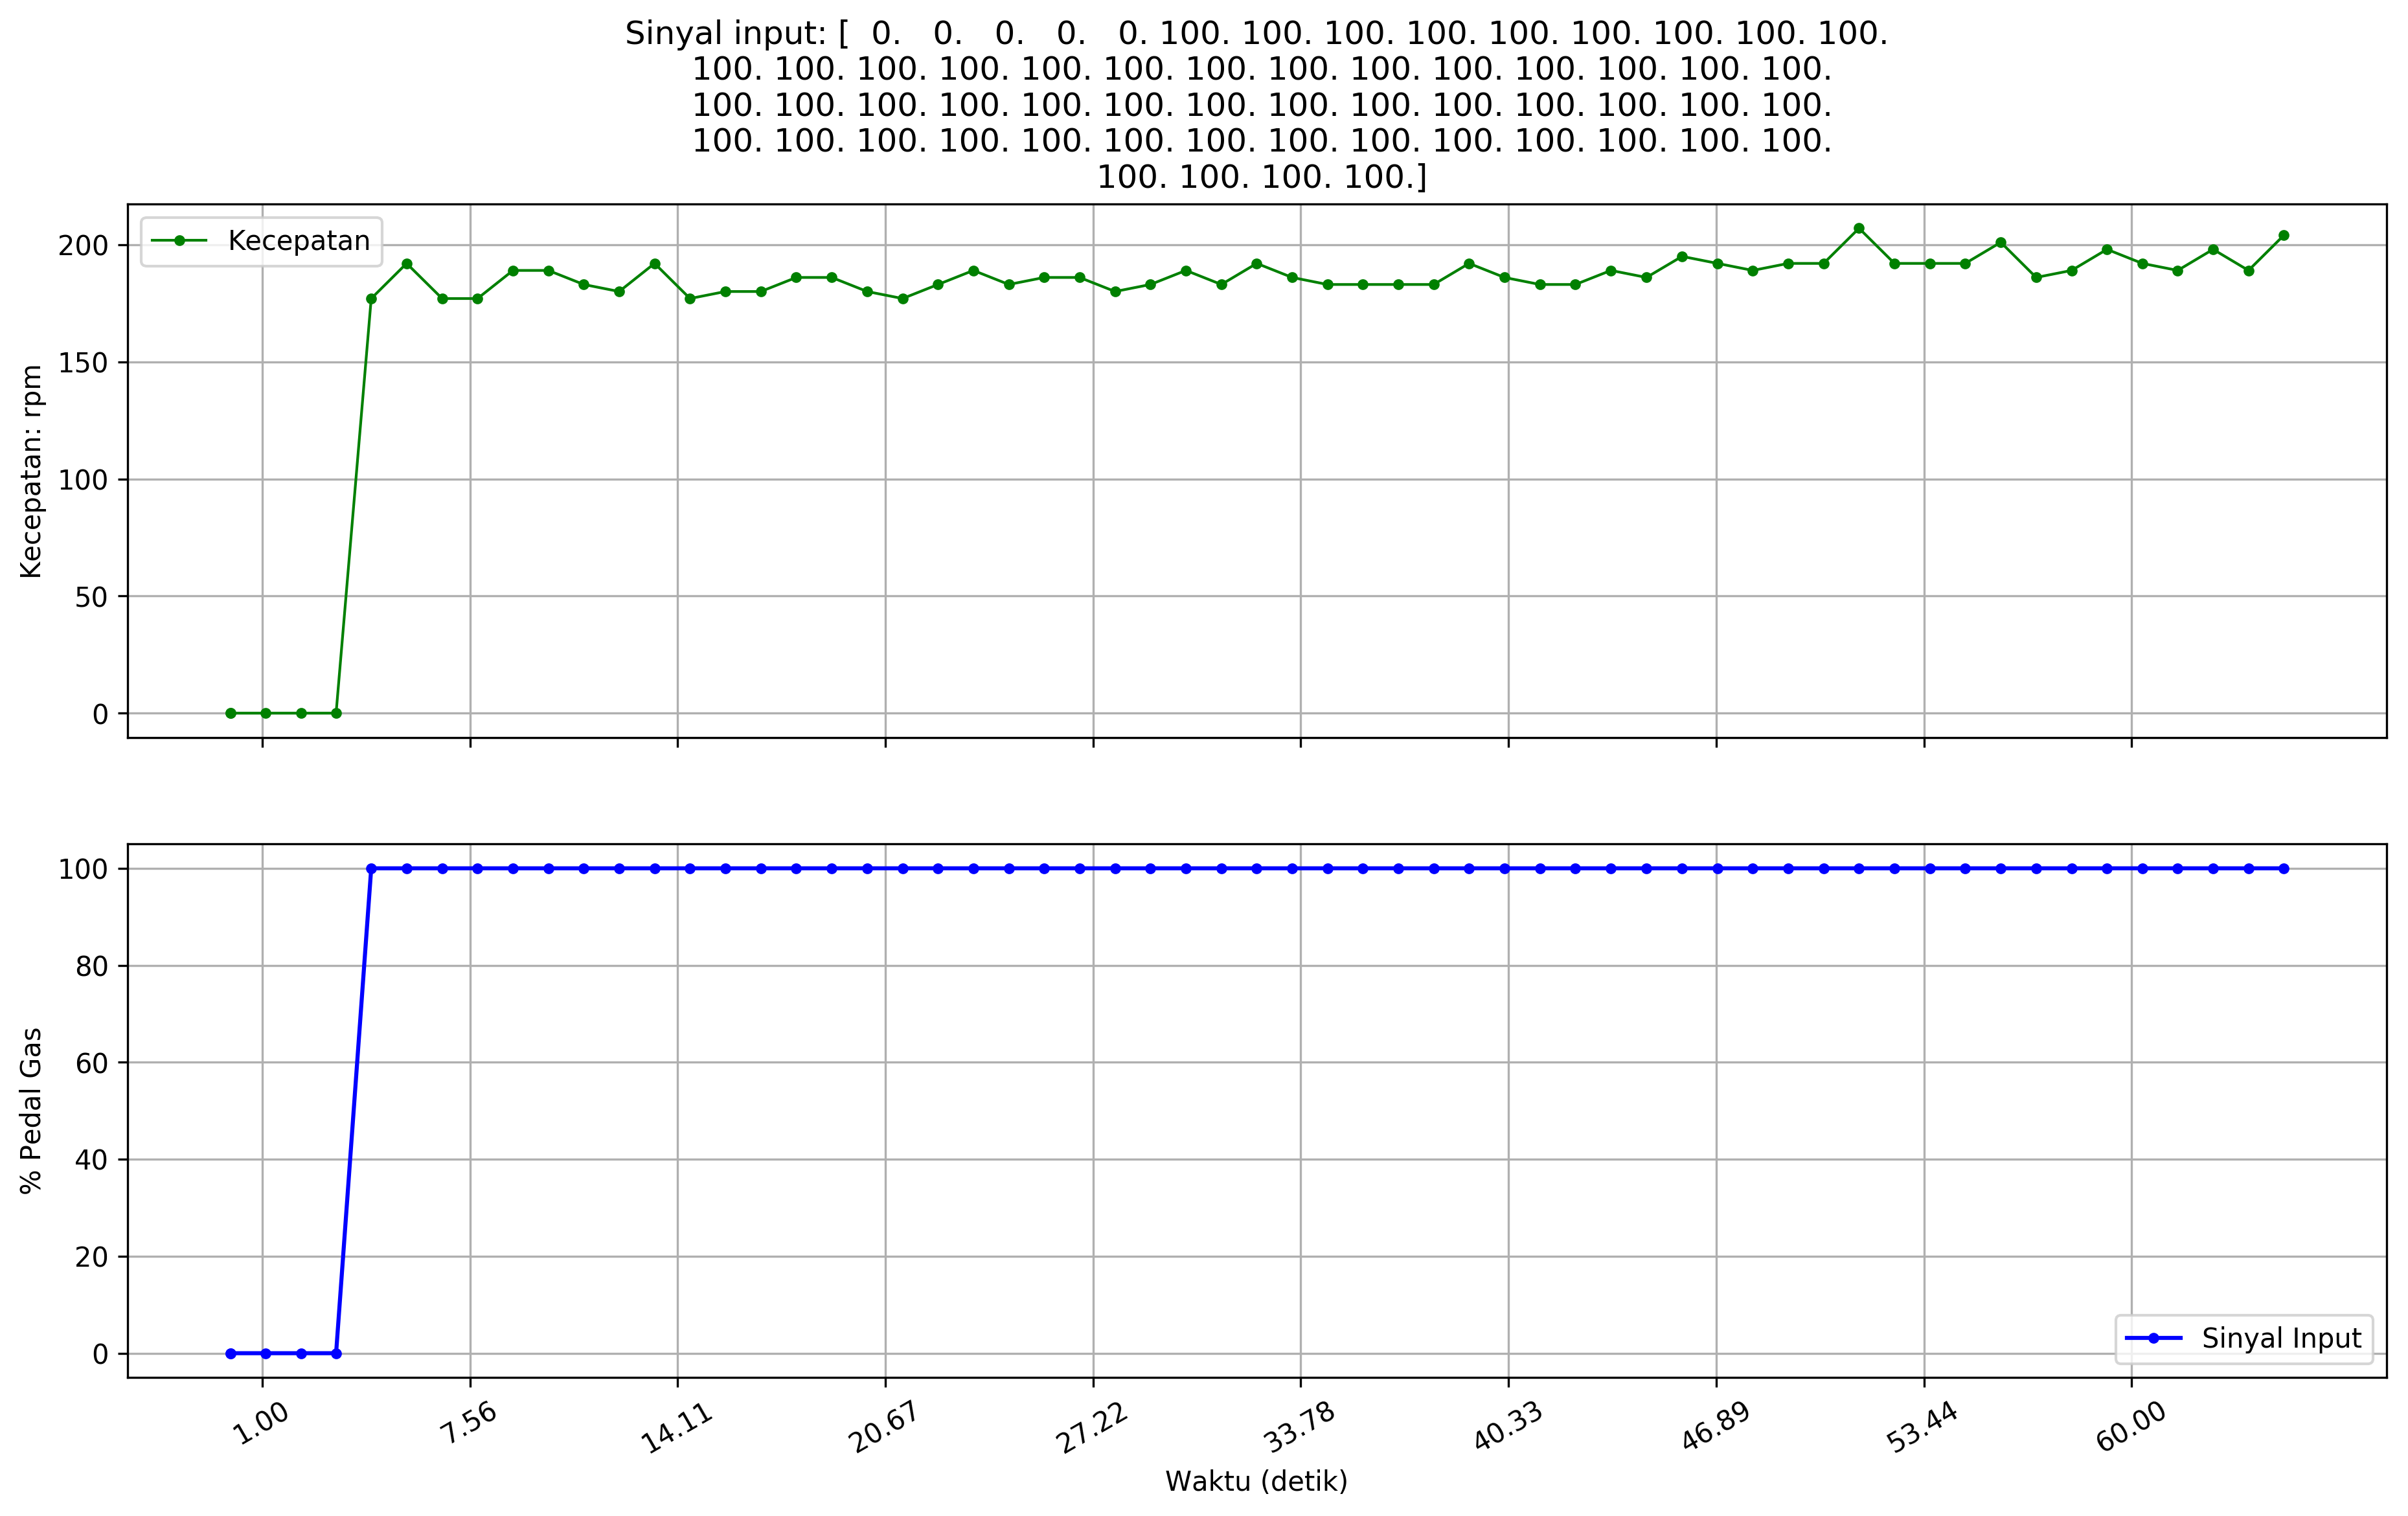

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot results
fig= plt.figure(figsize=(15,8), dpi=300)
#fig.suptitle('Pengendalian Kecepatan Motor DC' , fontsize=16)

plt.subplot(2,1,1)
plt.title('Sinyal input: '+str(step))
plt.gca().grid(True)
plt.plot(waktu, c_v, color="green", linewidth=1, marker=".", label="Kecepatan")
plt.ylabel('Kecepatan: rpm')
plt.legend(loc='best', frameon=True)
plt.xticks(np.linspace(1,len(waktu),10,endpoint=True))
plt.tick_params(labelbottom='off')  

plt.subplot(2,1,2)
plt.gca().grid(True)
# select both y axis and x axis
#gridlines = plt.gca().get_xgridlines() + plt.gca().get_ygridlines()
plt.plot(waktu, step , color="blue",  marker=".", linewidth=1.5, label="Sinyal Input")
plt.ylabel('% Pedal Gas')    
plt.xlabel('Waktu (detik)')
plt.xticks(waktu, rotation=30)
plt.xticks(np.linspace(1,len(waktu),10,endpoint=True))
plt.legend(loc='lower right', frameon=True)

plt.savefig('motor-speed-max-speedxx.png', dpi=500, facecolor='w', edgecolor='w',
        orientation='portrait', papertype='legal', format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=True)
plt.show()


In [ ]:
sum(error)

In [5]:
conn.LED(0)

0.0